In [999]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
import seaborn as sns

pd.options.display.max_columns = 200

In [1000]:
train = pd.read_csv("/Users/botanovaolga/Desktop/Физтех/ML/train.csv")
test = pd.read_csv('/Users/botanovaolga/Desktop/Физтех/ML/test.csv')
sample_submission = pd.read_csv ("/Users/botanovaolga/Desktop/Физтех/ML/sample_submission.csv")

## Препроцессинг

1. Посмотрим на пропущенные значения по всем переменным

In [1001]:
lost = train.isna().sum(axis = 0)
lost.to_frame().transpose()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,0,0,259,0,0,1369,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,8,0,0,0,37,37,38,37,0,38,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,690,81,81,81,0,0,81,81,0,0,0,0,0,0,0,1453,1179,1406,0,0,0,0,0,0


В колонках Alley, FireplaceQu, PoolQC и Fence, GarageType, GarageFinish, BsmtQual, BsmtCond, GarageQual, GarageCond пропуски означают отсутсвие признака, заполним поля как None. GarageYrBlt и GarageFinish уберем. Остальные пропуски заменим на среднее или моду.

In [1002]:
train = train.drop(columns = ['GarageYrBlt', 'GarageFinish'])

train[['MasVnrType', 'BsmtFinType1', 'Electrical']] = train[['MasVnrType', 'BsmtFinType1', 
                            'Electrical']].apply(lambda x: x.fillna(x.mode()[0]),axis=0)

train[['LotFrontage', 'MasVnrArea']] = train[['LotFrontage', 
                                'MasVnrArea']].apply(lambda x: x.fillna(x.mean()),axis=0)

train[['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'GarageType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
       'BsmtFinType2', 'GarageQual', 'GarageCond', 'MiscFeature']] = train[['Alley', 'FireplaceQu', 'PoolQC', 
    'Fence', 'GarageType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2', 'GarageQual',
                                                    'GarageCond', 'MiscFeature']].fillna('None')

In [1003]:
lost_ = test.isna().sum(axis = 0)
lost_.to_frame().transpose()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,0,4,227,0,0,1352,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,16,15,0,0,0,44,45,44,42,1,42,1,1,1,0,0,0,0,0,0,0,0,2,2,0,0,0,0,1,0,2,0,730,76,78,78,1,1,78,78,0,0,0,0,0,0,0,1456,1169,1408,0,0,0,1,0


In [1004]:
test = test.drop(columns = ['GarageYrBlt', 'GarageFinish'])

test[['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtFinType1', 'Electrical', 
      'KitchenQual', 'Functional', 'SaleType']] = test[['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtFinType1', 'Electrical', 
      'KitchenQual', 'Functional', 'SaleType']].apply(lambda x: x.fillna(x.mode()[0]),axis=0)

test[['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 
      'BsmtHalfBath', 'GarageCars', 'GarageArea']] = test[['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 
    'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 
                                                'GarageArea']].apply(lambda x: x.fillna(x.mean()),axis=0)

test[['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'GarageType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
       'BsmtFinType2', 'GarageQual', 'GarageCond', 'MiscFeature']] = test[['Alley', 'FireplaceQu', 'PoolQC', 
        'Fence', 'GarageType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
       'BsmtFinType2', 'GarageQual', 'GarageCond', 'MiscFeature']].fillna('None')

2. Уберем аутлаеры

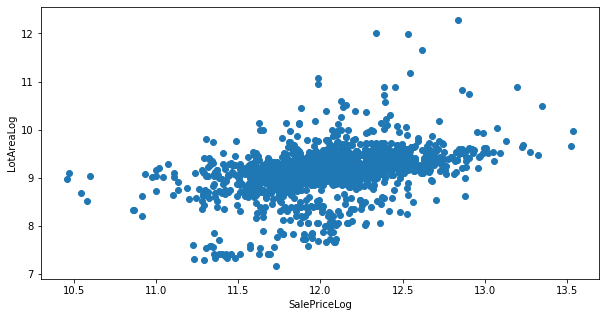

In [1005]:
plt.figure(figsize = (10, 5))
plt.scatter(np.log1p(train['SalePrice']), np.log1p(train['LotArea']))
plt.ylabel('LotAreaLog')
plt.xlabel('SalePriceLog')
plt.show()

In [1006]:
train['SalePriceLog'] = np.log1p(train['SalePrice'])
train['LotAreaLog'] = np.log1p(train['LotArea'])
train = train[(train['SalePriceLog'] < 13.5)&(train['SalePriceLog'] > 10.6)&(train['LotAreaLog'] < 11.5)]

3. Закодируем категориальные переменные, которые будем использовать

In [1007]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePriceLog,LotAreaLog
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,12.247699,9.042040
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,12.109016,9.169623
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,12.317171,9.328212
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,11.849405,9.164401
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,12.429220,9.565284


In [1008]:
enc = OneHotEncoder(drop = 'first')
enc.fit(train[['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'BldgType', 'RoofStyle', 'Foundation', 'CentralAir', 'GarageType', 'SaleType', 'SaleCondition', 'Fence', 'MoSold']])
encoded_features_train = pd.DataFrame(enc.transform(train[['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'BldgType', 'RoofStyle', 'Foundation', 'CentralAir', 'GarageType', 'SaleType', 'SaleCondition', 'Fence', 'MoSold']]).toarray(), 
                       columns = enc.get_feature_names(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'BldgType', 'RoofStyle', 'Foundation', 'CentralAir', 'GarageType', 'SaleType', 'SaleCondition', 'Fence', 'MoSold']))
encoded_features_train['Id'] = train['Id']
encoded_features_train

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,CentralAir_Y,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,Id
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1445.0
1445,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [1009]:
enc = OneHotEncoder(drop = 'first')
enc.fit(test[['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'BldgType', 'RoofStyle', 'Foundation', 'CentralAir', 'GarageType', 'SaleType', 'SaleCondition', 'Fence', 'MoSold']])
encoded_features_test = pd.DataFrame(enc.transform(test[['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'BldgType', 'RoofStyle', 'Foundation', 'CentralAir', 'GarageType', 'SaleType', 'SaleCondition', 'Fence', 'MoSold']]).toarray(), 
                       columns = enc.get_feature_names(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'BldgType', 'RoofStyle', 'Foundation', 'CentralAir', 'GarageType', 'SaleType', 'SaleCondition', 'Fence', 'MoSold']))
encoded_features_test['Id'] = test['Id']
encoded_features_test

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,CentralAir_Y,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,Id
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1461
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1462
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1463
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1464
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2915
1455,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,

In [1010]:
encoded_label_train = train[['Id', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 
       'GarageCond']].replace({'Gd': 4, 'TA': 3, 'Ex': 5, 'Fa': 2, 'Po': 1, 'NA': 0, 'None': 0})
encoded_label_train.head()

,Id,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageCond
0,1,3,4,3,5,4,0,3
1,2,3,4,3,5,3,3,3
2,3,3,4,3,5,4,3,3
3,4,3,3,4,4,4,4,3
4,5,3,4,3,5,4,3,3


In [1011]:
encoded_label_test = test[['Id', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 
       'GarageCond']].replace({'Gd': 4, 'TA': 3, 'Ex': 5, 'Fa': 2, 'Po': 1, 'NA': 0, 'None': 0})
encoded_label_test.head()

,Id,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageCond
0,1461,3,3,3,3,3,0,3
1,1462,3,3,3,3,4,0,3
2,1463,3,4,3,4,3,3,3
3,1464,3,3,3,5,4,4,3
4,1465,3,4,3,5,4,0,3


In [1012]:
#соберем все данные
train_ = train[['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'MasVnrArea', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
              'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
              'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'SalePriceLog']]
train_ = train_.merge(encoded_features_train, on = 'Id')
train_ = train_.merge(encoded_label_train, on = 'Id')

test_ = test[['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'MasVnrArea', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
              'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
              'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold']]
test_ = test_.merge(encoded_features_test, on = 'Id')
test_ = test_.merge(encoded_label_test, on = 'Id')



In [1013]:
train_.head(3)

,Id,LotFrontage,LotArea,YearBuilt,MasVnrArea,TotalBsmtSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePriceLog,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,CentralAir_Y,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageCond
0,1,65.0,8450,2003,196.0,856,0,1710,1,0,2,1,3,1,8,0,548,0,61,0,0,0,0,0,2008,12.247699,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,4,3,5,4,0,3
1,2,80.0,9600,1976,0.0,1262,0,1262,0,1,2,0,3,1,6,1,460,298,0,0,0,0,0,0,2007,12.109016,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,4,3,5,3,3,3
2,3,68.0,11250,2001,162.0,920,0,1786,1,0,2,1,3,1,6,1,608,0,42,0,0,0,0,0,2008,12.317171,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3,4,3,5,4,3,3


4. Посмотрим на значимость и отберем признаки, затем будем добавлять категориальные и формировать модель.

In [1035]:
y_train = train_['SalePriceLog']
X_train = train_.drop(columns= ['SalePriceLog', 'Id'])
X_test = test_.drop(columns= ['Id'])


In [1038]:
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:           SalePriceLog   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          6.980e+04
Date:                Wed, 23 Sep 2020   Prob (F-statistic):                        0.00
Time:                        19:15:34   Log-Likelihood:                          665.69
No. Observations:                1438   AIC:                                     -1095.
Df Residuals:                    1320   BIC:                                     -473.4
Df Model:                         118                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

### 1

In [1028]:
#без категориальных признаков
x = ['LotFrontage', 'LotArea', 'MasVnrArea', 'YearBuilt', 'GrLivArea', 'TotalBsmtSF', 'HalfBath', 'BedroomAbvGr',
     'KitchenAbvGr', 'GarageArea', 'YrSold', 'MiscVal']
cross_val_score(estimator=LinearRegression(normalize = True), X=X_train[x], y=y_train,
                cv=5, scoring = 'neg_root_mean_squared_error').mean()

-0.1922314054483511

In [1029]:
model = LinearRegression()
model.fit(X_train[x], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1030]:
prediction = model.predict(X_test[x])

In [1031]:
prediction

array([11.82417394, 11.9184523 , 12.1720951 , ..., 11.92426356,
       11.75629003, 12.35441668])

In [1032]:
sample_submission['SalePrice'] =  np.exp(prediction)-1

### 2

In [1021]:
#c некоторыми категориальными признаками

x = ['LotFrontage', 'LotArea', 'MasVnrArea', 'YearBuilt', 'GrLivArea', 'TotalBsmtSF', 'HalfBath', 'BedroomAbvGr',
     'KitchenAbvGr', 'GarageArea', 'YrSold', 'MiscVal', 'GarageCond', 'KitchenQual', 'HeatingQC', 'BsmtQual', 
        'ExterCond', 'Fireplaces']
cross_val_score(estimator=LinearRegression(normalize = True), X=X_train[x], y=y_train,
                cv=5, scoring = 'neg_root_mean_squared_error').mean()

-0.17157172810232132

In [1022]:
model = LinearRegression()
model.fit(X_train[x], y_train)
prediction = model.predict(X_test[x])
prediction

array([11.7173181 , 11.94513864, 12.11638009, ..., 11.98419261,
       11.67586913, 12.27484182])

In [1023]:
sample_submission['SalePrice'] =  np.exp(prediction)-1
sample_submission.to_csv("/Users/botanovaolga/Desktop/Физтех/ML/sample_submission_ready.csv", index= None)

### 3

In [1041]:
#со всеми значимыми категориальными признаками


x = ['LotArea', 'MasVnrArea', 'YearBuilt', 'GrLivArea', 'BsmtFullBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd',
     'GarageArea', 'YrSold', 'MiscVal', 'ScreenPorch', 'PoolArea', 'GarageCond', 'KitchenQual', 'HeatingQC', 
     'BsmtQual', 'BsmtCond', 'ExterCond', 'Fireplaces', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'RoofStyle_Gambrel',
     'MoSold_2', 'MoSold_7', 'Neighborhood_NridgHt', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr']


cross_val_score(estimator=LinearRegression(normalize = True), X=X_train[x], y=y_train,
                cv=5, scoring = 'neg_root_mean_squared_error').mean()

-0.16559374623090065

Посмотрим на корреляцию признаков. Некоторые имеют достаточно высокую корреляцию, однако без них ошибка увеличивается, так что пускай живут.

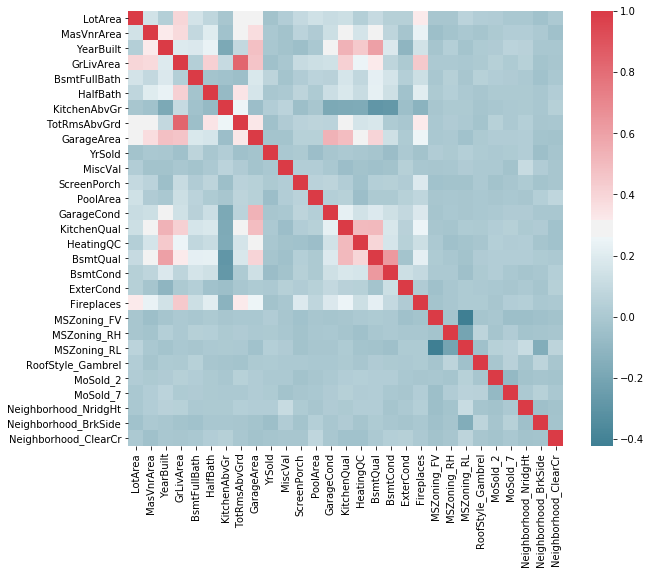

In [914]:
f, ax = plt.subplots(figsize=(10, 8))
corr = X_train[x].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
               square=True, ax=ax)

In [915]:
model = LinearRegression(normalize = True)
model.fit(X_train[x], y_train)
prediction = model.predict(X_test[x])
prediction

array([11.75844226, 11.85733958, 12.06189949, ..., 12.00835959,
       11.67248482, 12.28038508])

## Лидерборд vs кросс-валидация
Увы, случайно перезаписала и не сохранила первые выкладки по кросс-валидации, в истории остались лишь три, но общая зависимость была видна: ошибки на кросс-валидации и на лидерборде однонаправлены (с поправкой на то, что в используемом мною пакете почему-то rmse почему-то есть только с отрицательным коэффициентом)

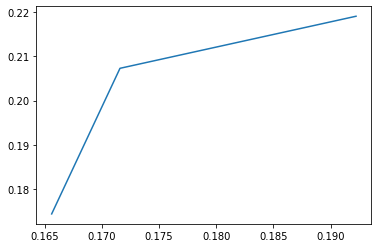

In [1052]:
my_array = [[0.19223, 0.21904], [0.17157, 0.20729], [0.16559, 0.17443]]
my_array = pd.DataFrame(data = my_array, columns = ['x', 'y'])
plt.plot(my_array['x'], my_array['y'])